In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
sns.set()

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("kidney_disease.csv")

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 26)

In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_impute=pd.DataFrame(imp_mode.fit_transform(df))
df_impute.columns=df.columns
df_impute

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [12]:
df_impute.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
df_impute.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [14]:
for i in df_impute.columns:
    print("************************",i,
         "*****************************")
    print()
    print(set(df_impute[i].tolist()))
    print()

************************ id *****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

In [15]:
df_impute["classification"]=df_impute["classification"].apply(lambda x :"ckd" if x=="ckd\t" else x)

In [16]:
df_impute["classification"].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [17]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [18]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_impute[i]=df_impute[i].apply(lambda x:float(x))

In [19]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [20]:
df_impute["cad"]=df_impute["cad"].apply(lambda x :"no" if x=="\tno" else x)
df_impute["dm"]=df_impute["dm"].apply(lambda x :"no" if x=="\tno" else x)
df_impute["dm"]=df_impute["dm"].apply(lambda x :"yes" if x=="\tyes" else x)

In [21]:
df_impute["rc"]=df_impute["rc"].apply(lambda x :"5.2" if x=="\t?" else x)

In [22]:
df_impute["rc"].value_counts()

rc
5.2    149
4.5     16
4.9     14
4.7     11
5       10
3.9     10
4.8     10
4.6      9
3.4      9
5.9      8
3.7      8
6.1      8
5.5      8
5.4      7
5.3      7
5.8      7
3.8      7
4.2      6
4.3      6
4        6
5.6      6
5.1      5
6.2      5
6.4      5
5.7      5
6.5      5
4.1      5
4.4      5
3.2      5
6        4
3.6      4
6.3      4
3.3      3
3        3
3.5      3
2.6      2
2.8      2
2.9      2
2.5      2
2.7      2
2.1      2
3.1      2
2.3      1
2.4      1
8        1
Name: count, dtype: int64

In [23]:
df_impute["rc"]=df_impute["rc"].apply(lambda x :"5.2" if x=="\t?" else x)

In [24]:
df_impute["wc"]=df_impute["wc"].apply(lambda x :"9800" if x=="\t?" else x)
df_impute["wc"]=df_impute["wc"].apply(lambda x :"8400" if x=="\t8400" else x)
df_impute["wc"]=df_impute["wc"].apply(lambda x :"6200" if x=="\t6200" else x)

In [25]:
df_impute["pcv"]=df_impute["pcv"].apply(lambda x :"43" if x=="\t43" else x)
df_impute["pcv"]=df_impute["pcv"].apply(lambda x :"41" if x=="\t?" else x)

In [26]:
for i in df_impute.columns:
    print("************************",i,
         "*****************************")
    print()
    print(set(df_impute[i].tolist()))
    print()

************************ id *****************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 

In [27]:
df_impute["dm"]=df_impute["dm"].apply(lambda x :"yes" if x==" yes" else x)

In [28]:
df_impute["dm"].value_counts()

dm
no     263
yes    137
Name: count, dtype: int64

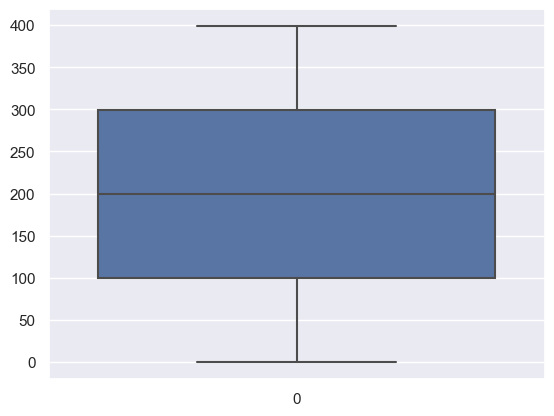

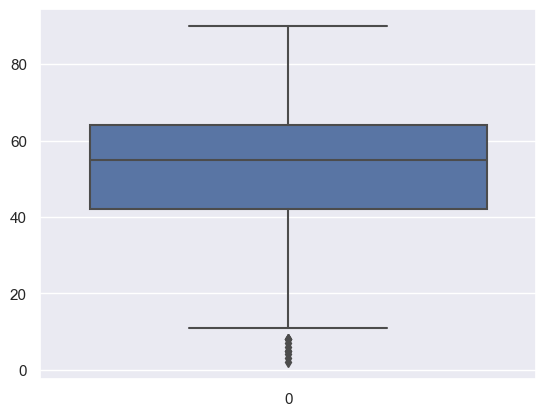

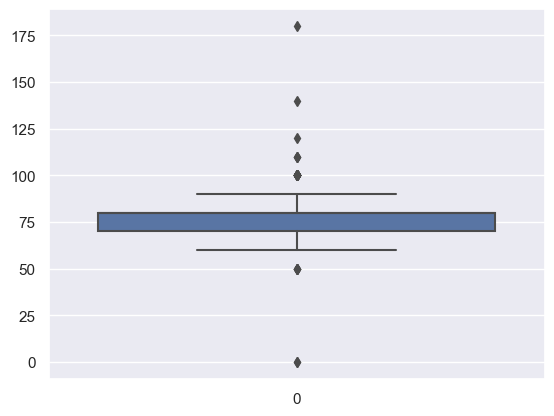

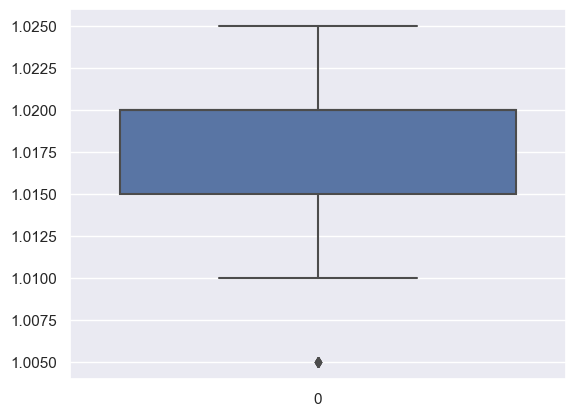

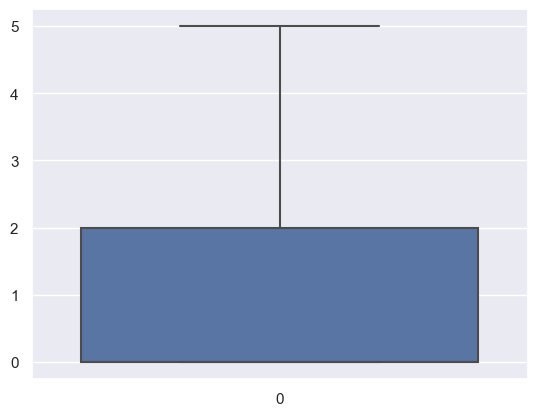

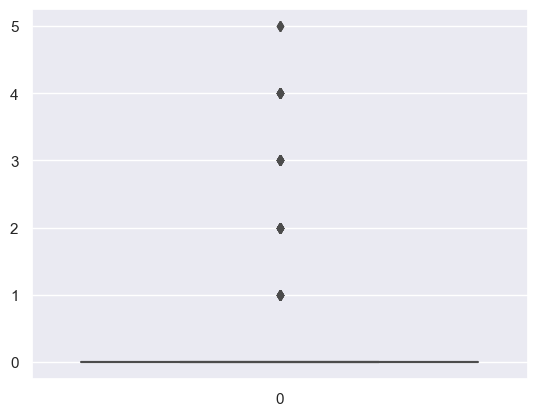

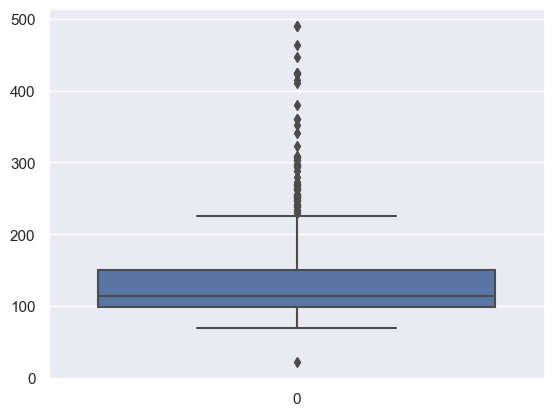

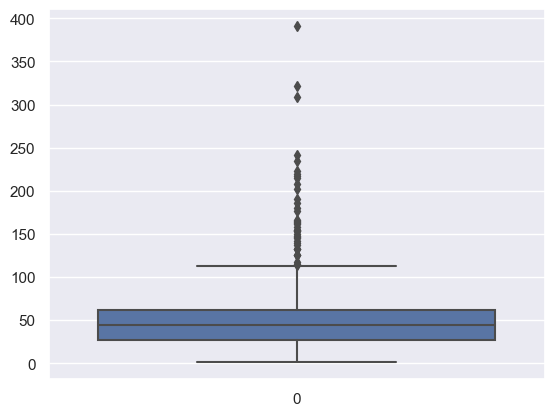

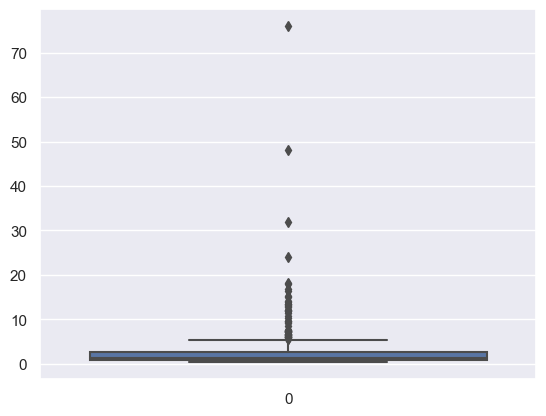

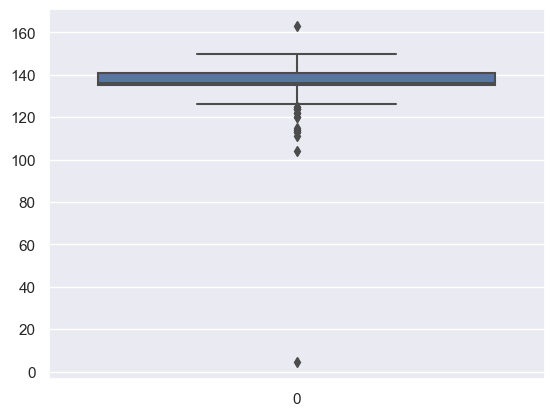

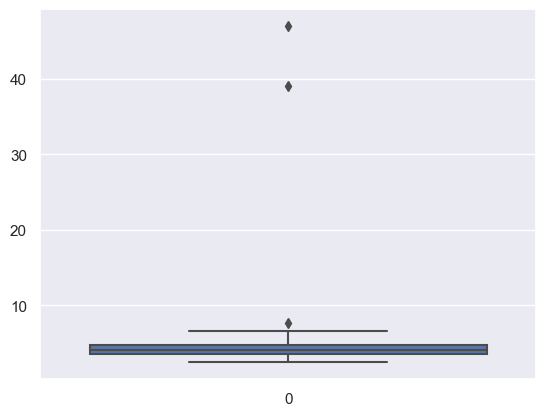

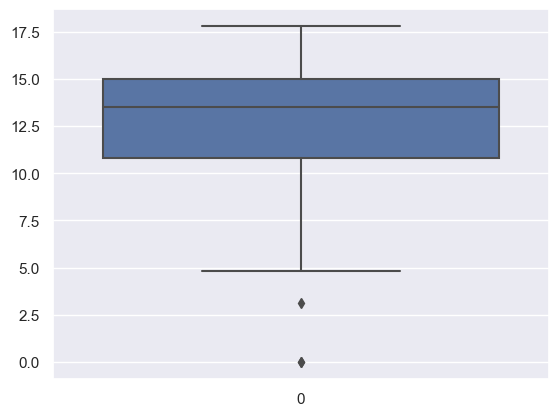

In [29]:
def boxplots(cols):
    sns.boxplot(df_impute[cols])
    plt.show()
for i in list (df_impute.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

In [30]:
from sklearn import preprocessing

In [31]:
df_enco=df_impute.apply(preprocessing.LabelEncoder().fit_transform)

In [32]:
df_enco.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,4,3,1,0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,5,1,3,4,0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,54,4,1,2,3,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,40,3,0,4,0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,43,0,1,2,0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0


In [33]:
df_enco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              400 non-null    int64
 1   age             400 non-null    int64
 2   bp              400 non-null    int64
 3   sg              400 non-null    int64
 4   al              400 non-null    int64
 5   su              400 non-null    int64
 6   rbc             400 non-null    int32
 7   pc              400 non-null    int32
 8   pcc             400 non-null    int32
 9   ba              400 non-null    int32
 10  bgr             400 non-null    int64
 11  bu              400 non-null    int64
 12  sc              400 non-null    int64
 13  sod             400 non-null    int64
 14  pot             400 non-null    int64
 15  hemo            400 non-null    int64
 16  pcv             400 non-null    int32
 17  wc              400 non-null    int32
 18  rc              400 non-null  

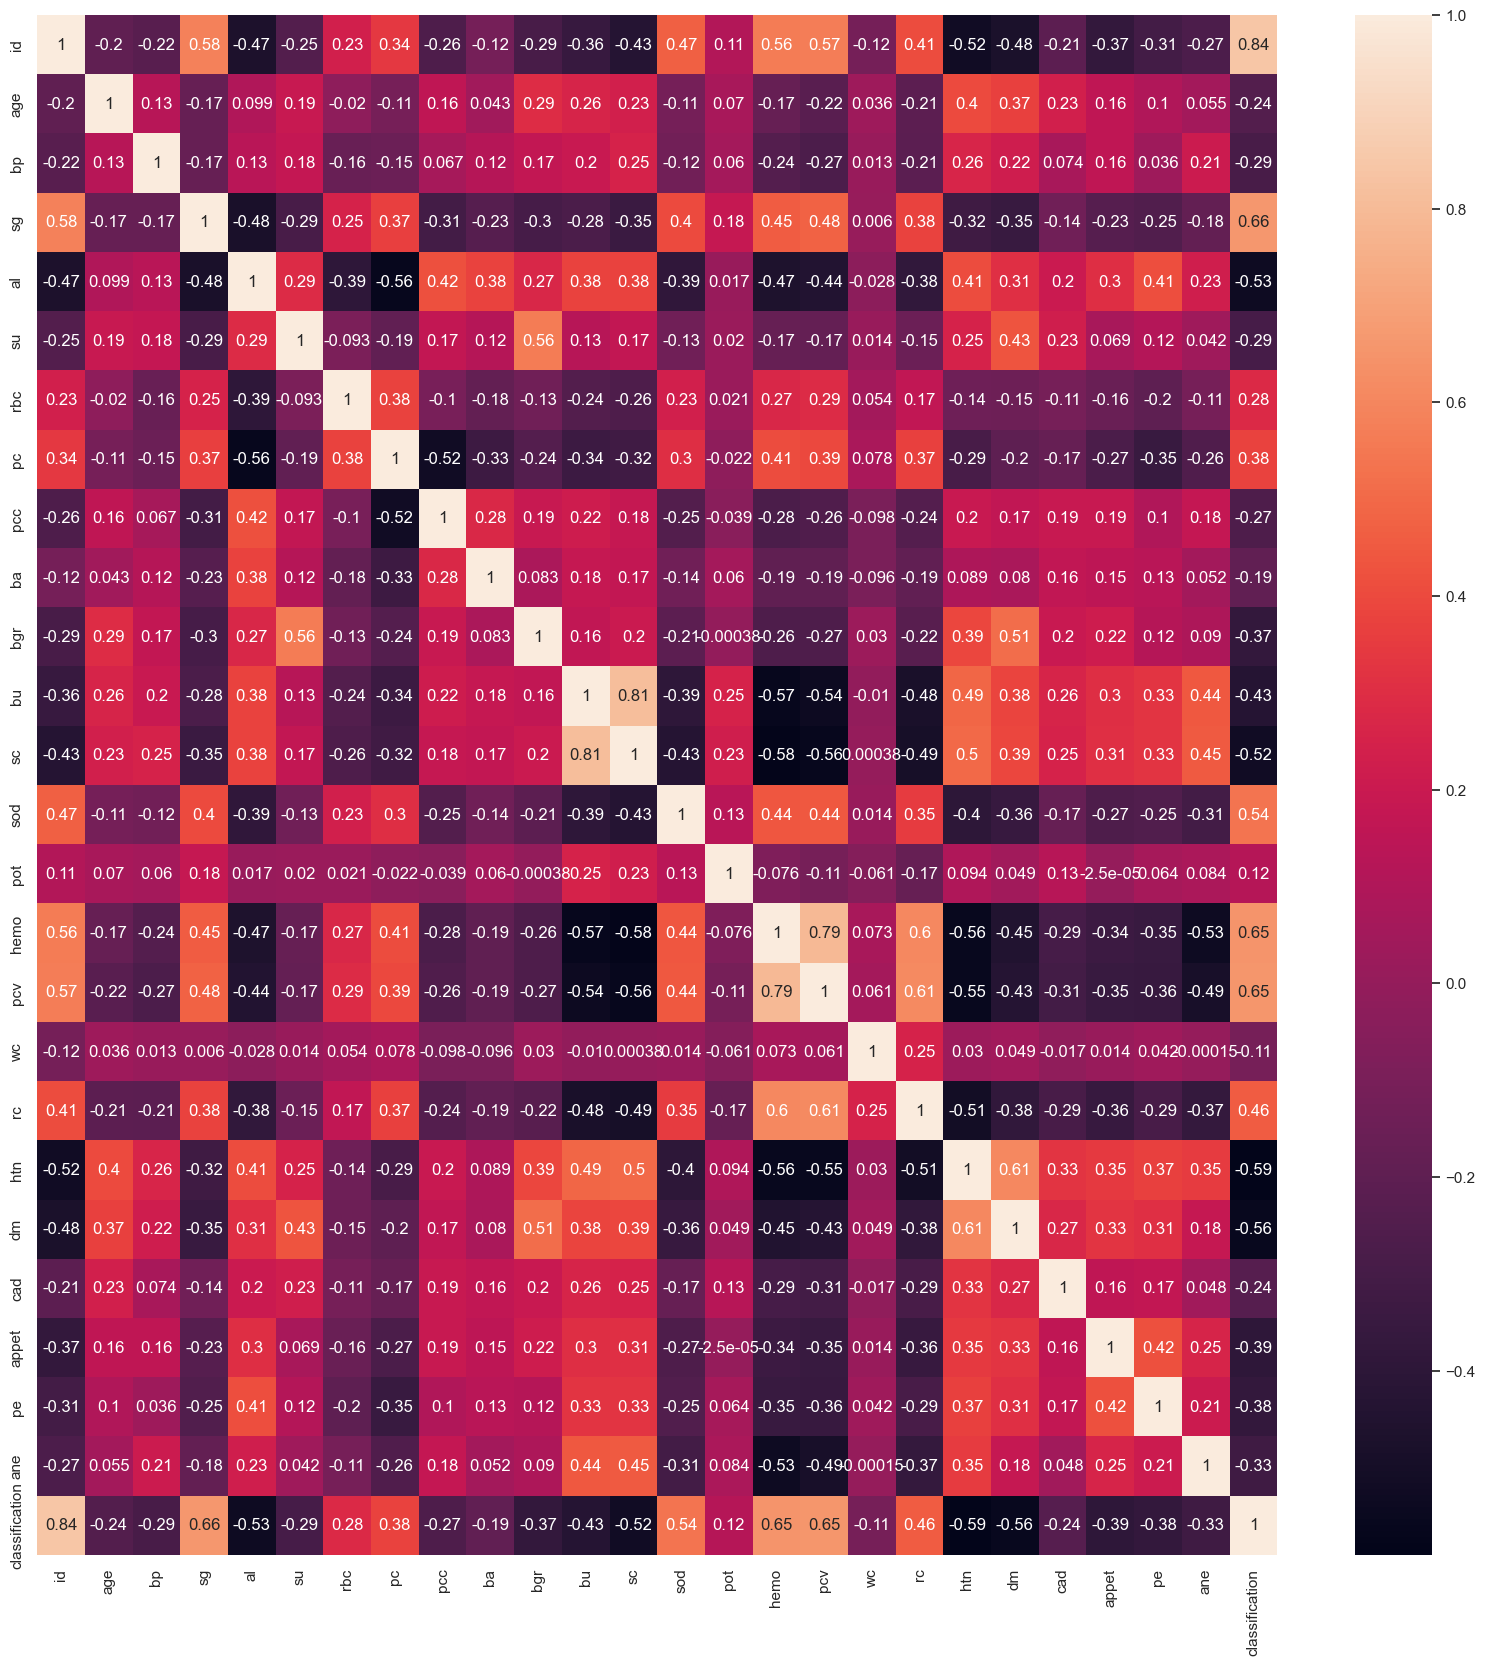

In [34]:
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [86]:
df_enco.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [87]:
x=df_enco.drop(["id","classification"],axis=1)

In [88]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,4,3,1,0,1,1,0,0,48,...,90,30,69,30,1,1,0,0,0,0
1,5,1,3,4,0,1,1,0,0,26,...,49,24,53,30,0,0,0,0,0,0
2,54,4,1,2,3,1,1,0,0,140,...,32,17,67,30,0,1,0,1,0,1
3,40,3,0,4,0,1,0,1,0,44,...,48,18,59,17,1,0,0,1,1,1
4,43,0,1,2,0,1,1,0,0,33,...,52,21,65,24,0,0,0,0,0,0


In [90]:
y=df_enco[["classification"]]

In [91]:
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [92]:
y.value_counts()

classification
0                 250
1                 150
Name: count, dtype: int64

In [41]:
y.value_counts()/len(y)*100

classification
0                 62.5
1                 37.5
Name: count, dtype: float64

In [42]:
#pip uninstall scikit-learn

In [43]:
#pip install scikit-learn==1.2.2

In [44]:
#import imblearn

In [45]:
#from immblearn.over_sampling import RandomOverSampler
#from collections import Counter
#print (counter(y))

In [46]:
#ros=RandomOverSampler()
#x_ros,y_ros=ros.fit_resample(x,y)
#print(counter(y_ros))

In [47]:
#print(y.value_counts())

In [93]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,4,3,1,0,1,1,0,0,48,...,90,30,69,30,1,1,0,0,0,0
1,5,1,3,4,0,1,1,0,0,26,...,49,24,53,30,0,0,0,0,0,0
2,54,4,1,2,3,1,1,0,0,140,...,32,17,67,30,0,1,0,1,0,1
3,40,3,0,4,0,1,0,1,0,44,...,48,18,59,17,1,0,0,1,1,1
4,43,0,1,2,0,1,1,0,0,33,...,52,21,65,24,0,0,0,0,0,0


In [94]:
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [95]:
x.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,43.932500,3.627500,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,51.5800,...,64.770000,25.375000,61.460000,26.657500,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.284684,1.299217,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,35.9848,...,27.577771,8.087515,27.136957,8.601754,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,26.0000,...,44.000000,20.000000,47.000000,23.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,4.000000,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,41.5000,...,71.000000,27.000000,68.500000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,4.000000,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,70.0000,...,86.000000,30.000000,87.000000,30.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,75.000000,10.000000,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,145.0000,...,114.000000,41.000000,88.000000,44.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler=MinMaxScaler((-1,1))

In [98]:
x=scaler.fit_transform(x)

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca=PCA(0.95)

In [124]:
x_pca=pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(400, 24)
(400, 18)


In [123]:
y.shape

(400, 1)

In [102]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,y_train,x_test,y_test=train_test_split(x_pca,y,random_state=7,test_size=0.75)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [113]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [126]:
logistic=LogisticRegression()
lr=logistic.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)

ValueError: y should be a 1d array, got an array of shape (300, 18) instead.

In [115]:
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [116]:
y.shape

(400, 1)

In [118]:
y_train.shape

(100, 18)